# CISC455 Final Project - Convolutional Neural Networks Optimization using Genetic Algorithm

Pretrained Part

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from PIL import Image
import pandas as pd
import copy
%matplotlib inline
print("finished loading")

ModuleNotFoundError: No module named 'cv2'

In [1]:
from google.colab import drive # get the access from google drive
drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google.colab'

In [6]:
!pip3 install cv2


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [ ]:
path = '/content/drive/Shareddrives/SC project/EvolutionaryComputing-main/chest_XRay' # load image from google drive
os.chdir(path)

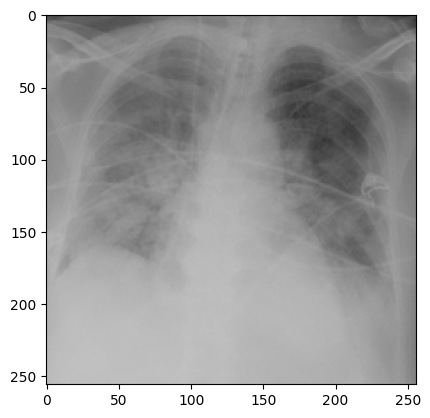

In [ ]:
train_img = Image.open('111.png').resize((256, 256))
plt.imshow(train_img, "gray")
plt.show()

In [ ]:
train_img_arr = np.array(train_img)
train_img_arr.shape

(256, 256, 3)

In [ ]:
y_train = pd.read_csv("/content/drive/Shareddrives/SC project/EvolutionaryComputing-main/data/y_train_covid.csv")["infection"]
y_train

0      1
1      1
2      1
3      0
4      1
      ..
482    1
483    1
484    1
485    1
486    1
Name: infection, Length: 487, dtype: int64

In [ ]:
print(os.listdir(path))

['86.png', '70.png', '99.png', '75.png', '98.png', '97.png', '69.png', '95.png', '94.png', '84.png', '73.png', '78.png', '91.png', '80.png', '90.png', '7.png', '81.png', '76.png', '68.png', '89.png', '9.png', '82.png', '85.png', '87.png', '56.png', '77.png', '5.png', '50.png', '83.png', '67.png', '483.png', '60.png', '486.png', '484.png', '66.png', '54.png', '49.png', '92.png', '72.png', '71.png', '96.png', '74.png', '52.png', '8.png', '88.png', '59.png', '79.png', '93.png', '58.png', '469.png', '62.png', '480.png', '65.png', '63.png', '466.png', '51.png', '6.png', '453.png', '485.png', '478.png', '462.png', '61.png', '55.png', '482.png', '57.png', '53.png', '456.png', '64.png', '459.png', '473.png', '467.png', '454.png', '472.png', '477.png', '468.png', '46.png', '47.png', '455.png', '471.png', '452.png', '457.png', '476.png', '458.png', '470.png', '48.png', '474.png', '463.png', '447.png', '465.png', '441.png', '446.png', '444.png', '475.png', '421.png', '430.png', '439.png', '464.pn

In [ ]:
y_lab = np.array(y_train).reshape(1,-1)
y_lab

array([[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 

In [ ]:
y_lab.shape

(1, 487)

In [ ]:
negative, positive = np.bincount(y_train)
class_0_weight = (1 / negative)*(negative + positive)/2.0 # scaling by total labels/2 suggested in the official document
class_1_weight = (1 / positive)*(negative + positive)/2.0

In [ ]:
class_weight = [class_0_weight, class_1_weight]
class_weight

[1.512422360248447, 0.7469325153374233]

In [ ]:
def sort(file):
  inidi = int(file.split(".")[0])
  return inidi

In [ ]:
def load_data(cur_dir, width, height, y_lab):
  data = torch.empty(0, 3, width, height)
  labels = torch.empty(0)
  sorted_path = sorted([file for file in os.listdir(cur_dir)], key=sort)
  for ind, f in enumerate(sorted_path):
    crop = Image.open(f).convert('RGB').resize((256, 256))
    crop = np.array(crop, dtype=np.float32)
    crop = crop / 255.
    print("file: {}, shape: {}".format(f, crop.shape))
    print("file: {}, max: {}, min: {}".format(f, np.max(crop), np.min(crop)))
    crop = torch.from_numpy(crop)
    crop = np.transpose(crop,(2,1,0))
    print("reshape: ", crop.shape)
    crop = crop.reshape(1, *crop.shape)
    label = y_lab[0][ind]
    label = torch.Tensor([int(label)])
    data = torch.cat((data, crop), dim=0)
    labels = torch.cat((labels, label))
  return data, labels

In [ ]:
cur_dir = path
width = 256
height = 256
x_train, x_lab = load_data(cur_dir, width, height, y_lab)

file: 0.png, shape: (256, 256, 3)
file: 0.png, max: 0.9450980424880981, min: 0.0
reshape:  torch.Size([3, 256, 256])
file: 1.png, shape: (256, 256, 3)
file: 1.png, max: 1.0, min: 0.0
reshape:  torch.Size([3, 256, 256])
file: 2.png, shape: (256, 256, 3)
file: 2.png, max: 1.0, min: 0.0
reshape:  torch.Size([3, 256, 256])
file: 3.png, shape: (256, 256, 3)
file: 3.png, max: 0.9490196108818054, min: 0.0
reshape:  torch.Size([3, 256, 256])
file: 4.png, shape: (256, 256, 3)
file: 4.png, max: 1.0, min: 0.0
reshape:  torch.Size([3, 256, 256])
file: 5.png, shape: (256, 256, 3)
file: 5.png, max: 0.8823529481887817, min: 0.0
reshape:  torch.Size([3, 256, 256])
file: 6.png, shape: (256, 256, 3)
file: 6.png, max: 1.0, min: 0.10196078568696976
reshape:  torch.Size([3, 256, 256])
file: 7.png, shape: (256, 256, 3)
file: 7.png, max: 1.0, min: 0.0
reshape:  torch.Size([3, 256, 256])
file: 8.png, shape: (256, 256, 3)
file: 8.png, max: 1.0, min: 0.0
reshape:  torch.Size([3, 256, 256])
file: 9.png, shape: (

In [ ]:
x_train.shape, x_lab.shape

(torch.Size([487, 3, 256, 256]), torch.Size([487]))

In [ ]:
torch.save(x_train, "/content/drive/Shareddrives/SC project/EvolutionaryComputing-main/train_images455.pt")
torch.save(x_lab, "/content/drive/Shareddrives/SC project/EvolutionaryComputing-main/train_labels455.pt")

In [ ]:
x_train = torch.load("/content/drive/Shareddrives/SC project/EvolutionaryComputing-main/train_images455.pt")
x_lab = torch.load("/content/drive/Shareddrives/SC project/EvolutionaryComputing-main/train_labels455.pt")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
x_train = x_train.to(device)
x_lab = x_lab.to(device)

In [ ]:
class getID(Dataset):
	def __init__(self, total_len):
		self.tmp = total_len
		self.total_len = self.tmp

	def __len__(self):
		return self.total_len

	def __getitem__(self, ind):
		return torch.Tensor([ind])

In [ ]:
total_len = x_train.shape[0]
total_len

487

In [ ]:
def get_train_val(train_ratio, total_len):
  torch.manual_seed(1)
  train_num = math.ceil(total_len * train_ratio)
  train_set, val_set = random_split(getID(total_len), lengths=(train_num, total_len - train_num))
  return train_set, val_set

In [ ]:
train_set, val_set = get_train_val(0.80, total_len)

In [ ]:
train_loader = DataLoader(train_set, batch_size=32, num_workers=0, shuffle=True, drop_last=True)
print(len(train_loader))

12


In [ ]:
val_loader = DataLoader(val_set, batch_size=32, num_workers=0, shuffle=True, drop_last=True)
print(len(val_loader))

3


In [ ]:
from torchvision import models
import torch.nn as nn
def set_parameter_requires_grad(model):
  for param in model.parameters():
    param.requires_grad = False

In [ ]:
model_ft = models.vgg16(pretrained=True)
set_parameter_requires_grad(model_ft)
num_ftrs = model_ft.classifier[6].in_features
model_ft.classifier[6] = nn.Linear(num_ftrs,2)
print(model_ft)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 72.1MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
def initializae_network(single_pop, num_classes):
  '''
  This function is for initializing the network given the parameters
  single_pop: single parent in total_pop
  num_classes: number of classes for the task
  '''
  net = MyClassifier(single_pop, num_classes)
  return net


In [ ]:
def compute_loss(model, optimizer, images, target, loss_fn, train_mode):

  predicted = model(images)
  #print(predicted)
  #predicted_lab = torch.argmax(predicted, dim=1).float()
  #print(predicted)
  loss = loss_fn(predicted, target.long())

  if train_mode:
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
  else:
      return loss.item(), torch.argmax(predicted, dim=1).float()

  return loss.item()

In [ ]:
def train(net, train_ind, train_img, train_lab, val_ind, optimizer, epochs, lr, weights):
  loss_fn = nn.CrossEntropyLoss(weight=torch.Tensor(weights).to(device), reduction="mean")
  lowest_loss = np.inf
  total_val_acc = []
  for epoch in range(epochs):
    net.zero_grad()
    loss = 0
    #net.train()
    for batch_idx in train_ind:
        net.train()
        #optimizer.zero_grad()
        batch_idx = batch_idx.view(-1).long()
        image_batch, label_batch = train_img[batch_idx], train_lab[batch_idx]
        train_loss = compute_loss(net, optimizer, image_batch, label_batch, loss_fn, train_mode=True)
        loss += train_loss

    loss /= len(train_ind)
    print("epoch: {}, train loss: {}".format(epoch+1, loss))
    loss_eval = 0

    #net.eval()
    with torch.no_grad():
      net.eval()
      actual_labels = torch.empty(0).long()
      predicted_labels = torch.empty(0).float()
      for batch_idx in val_ind:
          batch_idx = batch_idx.view(-1).long()
          image_batch, label_batch = train_img[batch_idx], train_lab[batch_idx]
          #print("val_ind: ", label_batch)
          actual_labels = torch.cat((actual_labels, label_batch.cpu()))
          eval_loss, predicted = compute_loss(net, optimizer, image_batch, label_batch, loss_fn, train_mode=False)
          predicted_labels = torch.cat((predicted_labels, predicted.cpu()))
          #print("val_ind predict: ", predicted)
          #val_acc = torch.sum(torch.squeeze(predicted).float() == all_label).item() / float(all_label.size()[0])
          loss_eval += eval_loss
      loss_eval /= len(val_ind)
      val_acc = torch.sum(predicted_labels == actual_labels).item() / len(actual_labels)
      total_val_acc.append(val_acc)
      print("eval loss: ", loss_eval)
      print("validation accuracy: ", val_acc)
  return np.mean(total_val_acc)

In [ ]:
import time
lr = 0.0005
optimizer = torch.optim.Adam(model_ft.parameters(), lr=lr)
epochs = 5
start = time.time()
val_acc = train(model_ft.to(device), train_loader, x_train, x_lab, val_loader, optimizer, epochs, lr, class_weight)
used = time.time()-start
print("training time: ", used)
print(val_acc)

epoch: 1, train loss: 0.7031155327955881
eval loss:  0.7019194761912028
validation accuracy:  0.3958333333333333
epoch: 2, train loss: 0.6504617035388947
eval loss:  0.6199079354604086
validation accuracy:  0.7395833333333334
epoch: 3, train loss: 0.621950959165891
eval loss:  0.6097603638966879
validation accuracy:  0.71875
epoch: 4, train loss: 0.5690339555342993
eval loss:  0.6009658972422282
validation accuracy:  0.6979166666666666
epoch: 5, train loss: 0.5746900762120882
eval loss:  0.6168840924898783
validation accuracy:  0.6979166666666666
training time:  2008.8758215904236
0.65


In [ ]:
print(x_lab)

tensor([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
        0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 1., 

In [ ]:
def predict(image):
  pct = model_ft(image.unsqueeze(0))
  if(pct[0][0] > pct[0][1]):
    print('Not infected')
  else:
    print('Infected')

In [ ]:
predict(x_train[0])
predict(x_train[3])
predict(x_train[10])

Infected
Not infected
Infected
